# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
import datetime
import time
from scipy.stats import linregress
from pprint import pprint
import json
from pandas.io.json import json_normalize
from sklearn import datasets, linear_model

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [231]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

In [280]:
def EpocTimeToRegularTime(inputTime):
   outputTime=datetime.datetime.fromtimestamp(int(inputTime)).strftime('%Y-%m-%d %H:%M:%S')
   return outputTime
#print(datetime.datetime.fromtimestamp(int("1284105682")).strftime('%Y-%m-%d %H:%M:%S'))

In [281]:
EpocTimeToRegularTime(1284105682)

'2010-09-10 04:01:22'

In [232]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [234]:
city_set=np.array_split(cities, 14)
i=0
j=0
print("Beginning Data Retrieval\n-----------------------------")
for set in city_set:
    j=j+1
    for city in set:        
        resp = requests.get(query_url + city)
        rtext = json.loads(resp.text)
        response = json_normalize(rtext)
        if resp.status_code == 200:
            if (i == 0) :
                CityData=pd.DataFrame(response)
            else:
                df=pd.DataFrame(response)
                CityData=CityData.append(df,verify_integrity=False, sort=False,ignore_index=True)
            i = i+1
            print(f"Processing Record {i} of Set {j} | {city}")
        else:
            print(f"City | {city} | not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | weligama


C:\ProgramData\Anaconda3\envs\Pythondata\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | bredasdorp
City | tsihombe | not found. Skipping...
Processing Record 5 of Set 1 | chokurdakh
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | bengkulu
City | mys shmidta | not found. Skipping...
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | tabou
Processing Record 10 of Set 1 | constitucion
Processing Record 11 of Set 1 | tura
Processing Record 12 of Set 1 | carupano
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | san ignacio
Processing Record 15 of Set 1 | yulara
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | saldanha
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | beloha
City | illoqqortoormiut | not found. Skipping...
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | weiser
Processing Reco

Processing Record 187 of Set 5 | port alfred
Processing Record 188 of Set 5 | bendigo
Processing Record 189 of Set 5 | taoudenni
Processing Record 190 of Set 5 | russell
City | samusu | not found. Skipping...
Processing Record 191 of Set 5 | thompson
Processing Record 192 of Set 5 | cherskiy
City | coulihaut | not found. Skipping...
Processing Record 193 of Set 5 | bathsheba
Processing Record 194 of Set 5 | esso
Processing Record 195 of Set 5 | odienne
Processing Record 196 of Set 5 | rosarito
Processing Record 197 of Set 5 | elat
Processing Record 198 of Set 5 | rocha
Processing Record 199 of Set 5 | linqiong
Processing Record 200 of Set 6 | presque isle
Processing Record 201 of Set 6 | mezen
Processing Record 202 of Set 6 | nikolskoye
Processing Record 203 of Set 6 | nacala
Processing Record 204 of Set 6 | ancud
Processing Record 205 of Set 6 | narasannapeta
Processing Record 206 of Set 6 | port blair
Processing Record 207 of Set 6 | camalu
Processing Record 208 of Set 6 | alta flore

Processing Record 369 of Set 10 | berlevag
Processing Record 370 of Set 10 | winthrop
Processing Record 371 of Set 10 | yining
Processing Record 372 of Set 10 | itaituba
Processing Record 373 of Set 10 | betioky
Processing Record 374 of Set 10 | talcher
Processing Record 375 of Set 10 | mukdahan
Processing Record 376 of Set 10 | pilcaya
Processing Record 377 of Set 10 | barranquilla
Processing Record 378 of Set 10 | siauliai
Processing Record 379 of Set 10 | den helder
Processing Record 380 of Set 10 | leningradskiy
Processing Record 381 of Set 10 | nishihara
Processing Record 382 of Set 10 | taltal
Processing Record 383 of Set 10 | nanortalik
Processing Record 384 of Set 10 | omboue
Processing Record 385 of Set 10 | talara
Processing Record 386 of Set 10 | carutapera
Processing Record 387 of Set 10 | toccoa
Processing Record 388 of Set 10 | rawson
Processing Record 389 of Set 10 | avera
Processing Record 390 of Set 10 | dunedin
City | jarjis | not found. Skipping...
Processing Record 

Processing Record 547 of Set 14 | takoradi
Processing Record 548 of Set 14 | fayetteville
Processing Record 549 of Set 14 | maxixe
Processing Record 550 of Set 14 | praya
Processing Record 551 of Set 14 | floresta
City | tabiauea | not found. Skipping...
Processing Record 552 of Set 14 | zhanakorgan
-----------------------------
Data Retrieval Complete
-----------------------------


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | darhan
Processing Record 3 of Set 1 | tarakan
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | jiuquan
Processing Record 7 of Set 1 | sesheke
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | clarence town
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | magadan
Processing Record 12 of Set 1 | salym
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | arys
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | rio gallegos
Processing Record 22 of Set 1 | kropotkin
Processing Record 23 of Set 1 | but

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [3]:
ouputpath="../output_data/"
csvpath="../output_data/cityweather_rawdata.csv"
CityData.to_csv(csvpath,header=True,index_label="City ID")
city_rawdata = pd.read_csv(csvpath, encoding="utf-8")

In [7]:
CityData_Organized=city_rawdata[["City ID","name","clouds.all","sys.country","dt","main.humidity","coord.lat","coord.lon",
                                 "main.temp_max",
                                 "wind.speed"]]
CityDataStructured= CityData_Organized.rename(columns={
                        "City ID" : "City ID",
                        "name" : "City Name", 
                        "clouds.all" : "Cloudiness" ,
                       	"sys.country" : "Country" ,
                        "dt" : "Date"  ,
                        "coord.lat" : "Latitude" ,
                        "coord.lon" : "Longitude" ,                      
                        "main.humidity" : "Humidity",                        
                        "main.temp_max" : "Max Temperature",
                        "wind.speed" :"Wind Speed"
                        })
CityDataStructured.to_csv(ouputpath + "CityDataStructured.csv",index=False)
CityDataStructured.head()

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,0,San Patricio,40,MX,1580090341,74,19.22,-104.70,80.60,9.17
1,1,Weligama,96,LK,1580090341,74,5.97,80.42,77.61,4.61
2,2,Tasiilaq,100,GL,1580090341,50,65.61,-37.64,28.40,2.24
3,3,Bredasdorp,67,ZA,1580089914,76,-34.53,20.04,55.40,1.12
4,4,Chokurdakh,98,RU,1580090006,96,70.63,147.92,-26.28,4.59


In [21]:
CityDataS = pd.DataFrame(CityDataStructured.loc[CityDataStructured["Latitude"] >= 0].reindex()).sort_values(by="Latitude")
CityDataS.head()

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
394,394,Macapa,90,BR,1580090320,100,0.04,-51.07,77.00,6.93
313,313,Mbandaka,11,CD,1580090033,35,0.05,18.26,69.73,1.01
255,255,Bontang,41,ID,1580090371,76,0.13,117.50,83.68,8.05
471,471,Thinadhoo,100,MV,1580090058,77,0.53,72.93,81.77,10.80
238,238,La Macarena,91,CO,1580090370,62,2.18,-73.78,76.50,0.51


City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [339]:
GetCurrentDate=date.today().strftime("%d/%m/%Y")

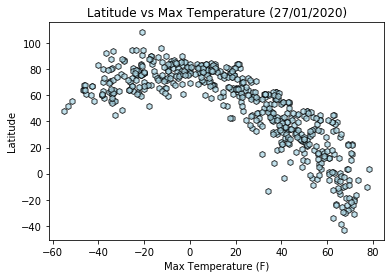

In [352]:
#Scatter Plot
plt.scatter(CityDataStructured["Latitude"],CityDataStructured["Max Temperature"],marker="h", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.title(f"Latitude vs Max Temperature ({GetCurrentDate})")
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.savefig(f"{ouputpath}LatitudevsTemperature.png")
plt.show()

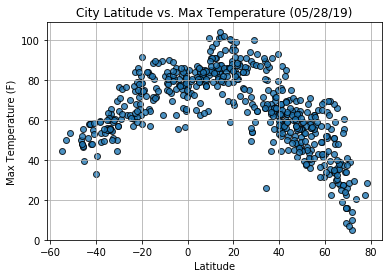

#### Latitude vs. Humidity Plot

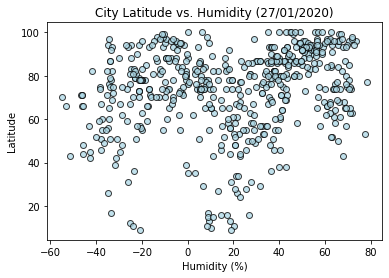

In [351]:
#Scatter Plot City Latitude vs. Humidity
plt.scatter(CityDataStructured["Latitude"],CityDataStructured["Humidity"],marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.title(f"City Latitude vs. Humidity ({GetCurrentDate})")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.savefig(f"{ouputpath}LatitudevsHumidity.png")
plt.show()

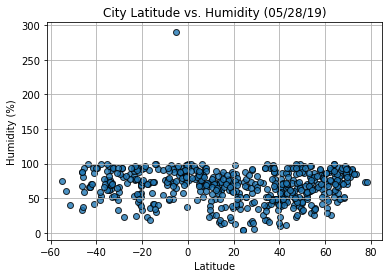

#### Latitude vs. Cloudiness Plot

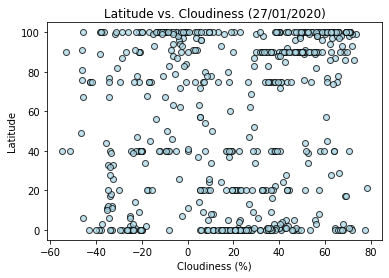

In [353]:
#Scatter Plot Latitude vs. Cloudiness
plt.scatter(CityDataStructured["Latitude"],CityDataStructured["Cloudiness"],marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.title(f"Latitude vs. Cloudiness ({GetCurrentDate})")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.savefig(f"{ouputpath}LatitudevsTemperature.png")
plt.show()

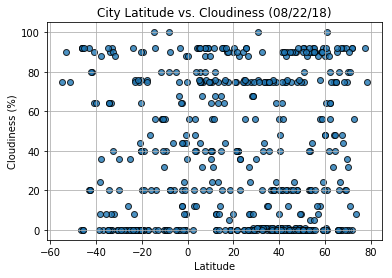

#### Latitude vs. Wind Speed Plot

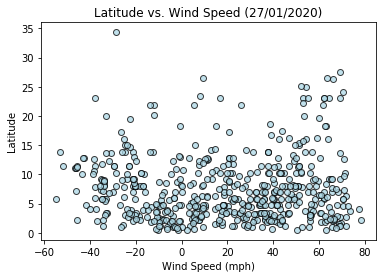

In [350]:
#Scatter Plot Latitude vs. Wind Speed 
plt.scatter(CityDataStructured["Latitude"],CityDataStructured["Wind Speed"],marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.title(f"Latitude vs. Wind Speed ({GetCurrentDate})")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.savefig(f"{ouputpath}LatitudevsWindSpeed.png")
plt.show()

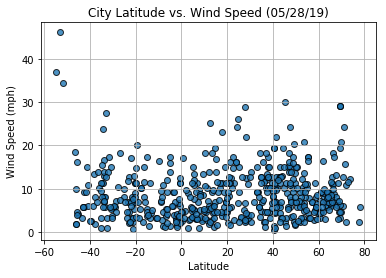

## Linear Regression

In [443]:
NorthernHemisphere.head()

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,0,San Patricio,40,MX,1580090341,74,19.22,-104.70,80.60,9.17
1,1,Weligama,96,LK,1580090341,74,5.97,80.42,77.61,4.61
2,2,Tasiilaq,100,GL,1580090341,50,65.61,-37.64,28.40,2.24
4,4,Chokurdakh,98,RU,1580090006,96,70.63,147.92,-26.28,4.59
7,7,Dikson,99,RU,1580089841,96,73.51,80.55,-5.22,3.65


In [466]:
SouthernHemisphere.head()

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
3,3,Bredasdorp,67,ZA,1580089914,76,-34.53,20.04,55.40,1.12
5,5,Cape Town,40,ZA,1580089795,87,-33.93,18.42,61.00,5.82
6,6,Bengkulu,99,ID,1580089581,62,-3.80,102.27,85.35,2.86
9,9,Constitucion,11,CL,1580089775,71,-35.33,-72.42,62.73,7.27
12,12,Atuona,67,PF,1580089769,70,-9.80,-139.03,81.25,8.68


The r-squared is: -0.8713365801380654


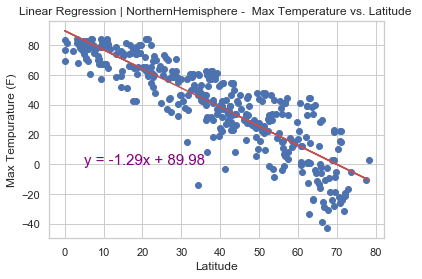

In [509]:
X= NorthernHemisphere["Latitude"]
Y= NorthernHemisphere["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
RegressionCalculation = x * slope + intercept
LinearEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Max Tempurature (F)")
plt.title("Linear Regression | NorthernHemisphere -  Max Temperature vs. Latitude ")
plt.plot(x,RegressionCalculation,"r-")
plt.annotate(LinearEquation,(5,0),fontsize=15,color="purple")
print(f"The r-squared is: {rvalue}")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

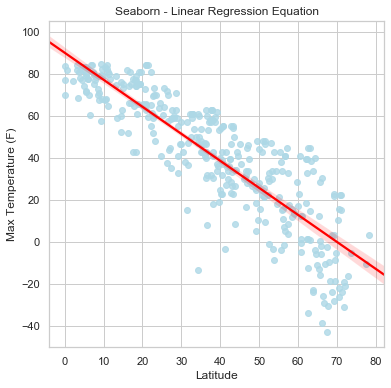

In [508]:
import seaborn as sb
fig5, ax5 = plt.subplots(figsize=(6, 6))
sb.set(style = 'whitegrid')
mylindf = pd.DataFrame(list(zip(NorthernHemisphere["Latitude"], NorthernHemisphere["Max Temperature"])))
sb.regplot(x=NorthernHemisphere["Latitude"], y=NorthernHemisphere["Max Temperature"], ax=ax5, data=df, scatter_kws={"color": "lightblue"}, line_kws={"color": "red"},marker='o',scatter=True,
   fit_reg=True,order=1);

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Seaborn - Linear Regression Equation")
plt.savefig(f"{ouputpath}Seaborn_LatitudevsTemperature.png")
plt.show

In [536]:
# OPTIONAL: Create a function to create Linear Regression plots
def myLinearRegressionPlot(x,y,xlabel,ylabel,GraphTitle,lx,ly):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    RegressionCalculation = x * slope + intercept
    LinearEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(GraphTitle)
    plt.plot(x,RegressionCalculation,"r-")
    plt.annotate(LinearEquation,(lx,ly),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}")
    plt.savefig(f"{ouputpath}LinearRegression_{xlabel}vs{ylabel}.png")
    plt.show()

In [526]:
# Create Northern and Southern Hemisphere DataFrames
NHFile=ouputpath + "City_NorthernHemisphere.csv"
NorthernHemisphere=CityDataStructured.loc[CityDataStructured["Latitude"] >= 0].reindex()
NorthernHemisphere.to_csv(NHFile,index=False)
SHFile=ouputpath + "City_SouthernHemisphere.csv"
SouthernHemisphere=CityDataStructured.loc[CityDataStructured["Latitude"] < 0].reindex()
SouthernHemisphere.to_csv(SHFile,index=False)
SouthernHemisphere.head()

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
3,3,Bredasdorp,67,ZA,1580089914,76,-34.53,20.04,55.40,1.12
5,5,Cape Town,40,ZA,1580089795,87,-33.93,18.42,61.00,5.82
6,6,Bengkulu,99,ID,1580089581,62,-3.80,102.27,85.35,2.86
9,9,Constitucion,11,CL,1580089775,71,-35.33,-72.42,62.73,7.27
12,12,Atuona,67,PF,1580089769,70,-9.80,-139.03,81.25,8.68


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8713365801380654


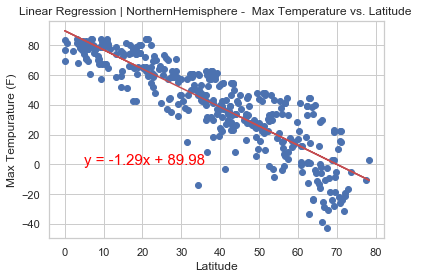

In [537]:
X= NorthernHemisphere["Latitude"]
Y= NorthernHemisphere["Max Temperature"]
xlabel= "Latitude"
ylabel= "Max Tempurature (F)"
GraphTitle = "Linear Regression | NorthernHemisphere -  Max Temperature vs. Latitude "
lx=5
ly=0
myLinearRegressionPlot(X,y,xlabel,ylabel,GraphTitle,lx,ly)

The r-squared is: -0.8151657406810827


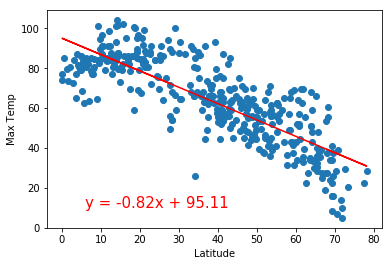

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4557055582447423


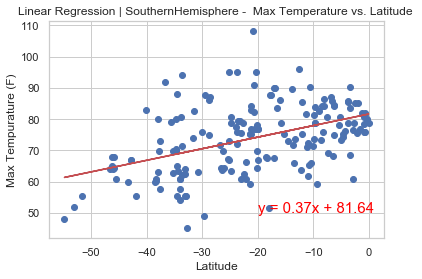

In [538]:
X= SouthernHemisphere["Latitude"]
Y= SouthernHemisphere["Max Temperature"]
xlabel= "Latitude"
ylabel= "Max Tempurature (F)"
GraphTitle = "Linear Regression | SouthernHemisphere -  Max Temperature vs. Latitude "
lx=-20
ly=50
myLinearRegressionPlot(X,Y,xlabel,ylabel,GraphTitle,lx,ly)

The r-squared is: 0.760263355051646


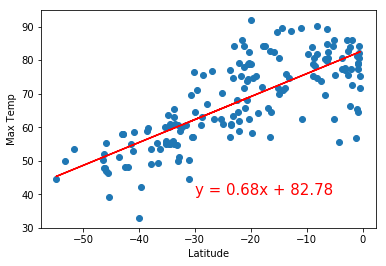

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3694392190310389


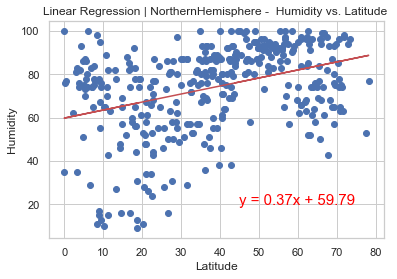

In [542]:
X= NorthernHemisphere["Latitude"]
Y= NorthernHemisphere["Humidity"]
xlabel= "Latitude"
ylabel= "Humidity"
GraphTitle = "Linear Regression | NorthernHemisphere -  Humidity vs. Latitude "
lx=45
ly=20
myLinearRegressionPlot(X,Y,xlabel,ylabel,GraphTitle,lx,ly)

The r-squared is: 0.10358336015746494


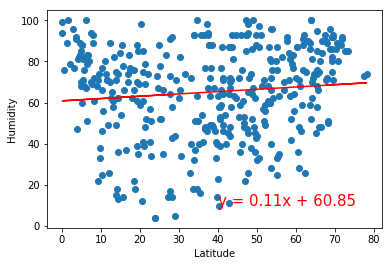

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.39907038394408695


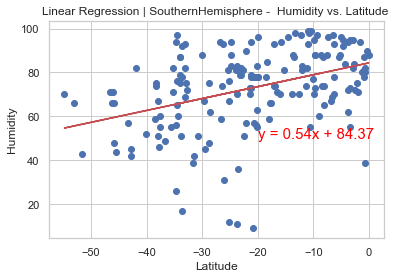

In [540]:
X= SouthernHemisphere["Latitude"]
Y= SouthernHemisphere["Humidity"]
xlabel= "Latitude"
ylabel= "Humidity"
GraphTitle = "Linear Regression | SouthernHemisphere -  Humidity vs. Latitude "
lx=-20
ly=50
myLinearRegressionPlot(X,Y,xlabel,ylabel,GraphTitle,lx,ly)

The r-squared is: 0.14689473425583055


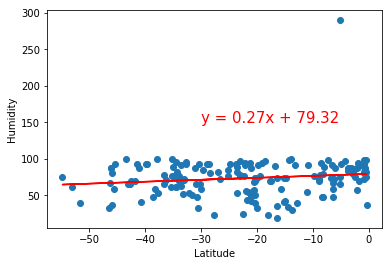

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.29960885256452124


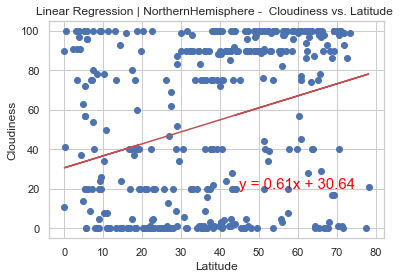

In [543]:
X= NorthernHemisphere["Latitude"]
Y= NorthernHemisphere["Cloudiness"]
xlabel= "Latitude"
ylabel= "Cloudiness"
GraphTitle = "Linear Regression | NorthernHemisphere -  Cloudiness vs. Latitude "
lx=45
ly=20
myLinearRegressionPlot(X,Y,xlabel,ylabel,GraphTitle,lx,ly)

The r-squared is: -0.08733547918934018


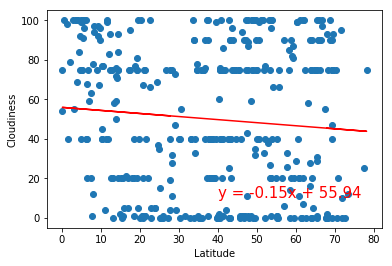

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3454144238427275


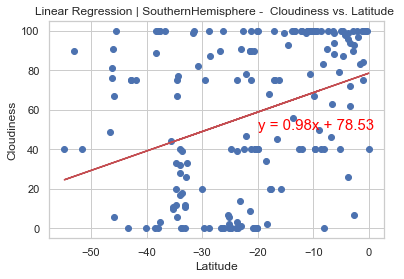

In [544]:
X= SouthernHemisphere["Latitude"]
Y= SouthernHemisphere["Cloudiness"]
xlabel= "Latitude"
ylabel= "Cloudiness"
GraphTitle = "Linear Regression | SouthernHemisphere -  Cloudiness vs. Latitude "
lx=-20
ly=50
myLinearRegressionPlot(X,Y,xlabel,ylabel,GraphTitle,lx,ly)

The r-squared is: 0.21881426893991618


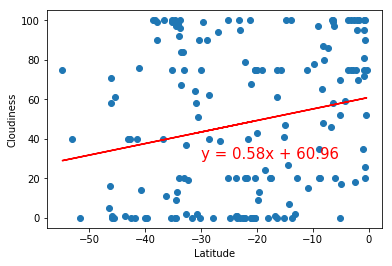

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1147359484577646


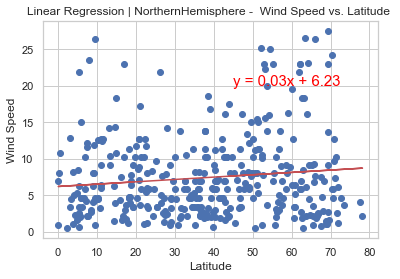

In [550]:
X= NorthernHemisphere["Latitude"]
Y= NorthernHemisphere["Wind Speed"]
xlabel= "Latitude"
ylabel= "Wind Speed"
GraphTitle = "Linear Regression | NorthernHemisphere -  Wind Speed vs. Latitude "
lx=45
ly=20
myLinearRegressionPlot(X,Y,xlabel,ylabel,GraphTitle,lx,ly)

The r-squared is: 0.1071382774388479


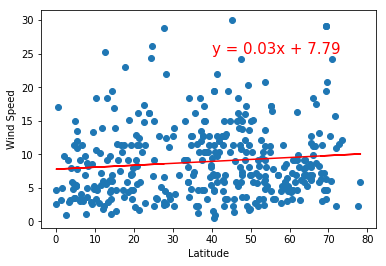

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2788503851379529


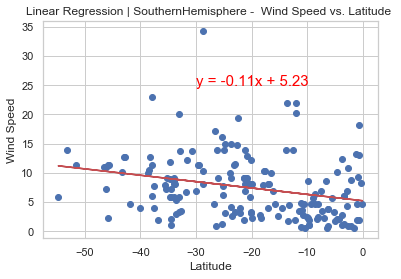

In [549]:
X= SouthernHemisphere["Latitude"]
Y= SouthernHemisphere["Wind Speed"]
xlabel= "Latitude"
ylabel= "Wind Speed"
GraphTitle = "Linear Regression | SouthernHemisphere -  Wind Speed vs. Latitude "
lx=-30
ly=25
myLinearRegressionPlot(X,Y,xlabel,ylabel,GraphTitle,lx,ly)

The r-squared is: -0.322483077139538


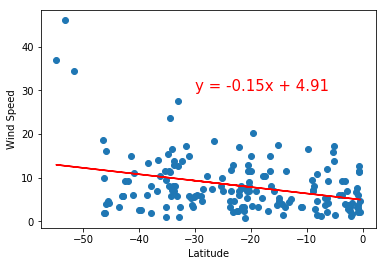